In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [363]:
df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')

In [364]:
df.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,4,4,4,4,4
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,4,4,4,4,4
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [365]:
df1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true')

In [366]:
df1.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31125.0,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,12810.6
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,NaN


In [367]:
df22 = df1[['Region','Codigo region','Codigo comuna','Comuna','Poblacion']]
##elimino las comunas que no me sirven del df2

In [368]:
df22.head()

,Region,Codigo region,Codigo comuna,Comuna,Poblacion
0,Arica y Parinacota,15,15101.0,Arica,247552.0
1,Arica y Parinacota,15,15102.0,Camarones,1233.0
2,Arica y Parinacota,15,15202.0,General Lagos,810.0
3,Arica y Parinacota,15,15201.0,Putre,2515.0
4,Arica y Parinacota,15,NaN,Desconocido Arica y Parinacota,NaN


In [369]:
df22=df22.dropna()
##elimino los nan del segundo df

In [370]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         346 non-null    object 
 1   Codigo region  346 non-null    int64  
 2   Codigo comuna  346 non-null    float64
 3   Comuna         346 non-null    object 
 4   Poblacion      346 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.2+ KB


In [371]:
df22['Poblacion']=df22['Poblacion'].astype(int)
df22['Codigo comuna']=df22['Codigo comuna'].astype(int)
##cambio los códigos de comuna del 2do df a int para que sean iguales a los del df1 y poder combinas ambos df, de esta manera tener un único df donde se encuentren las cuarentenas y además las poblaciones de c/ comuna

In [372]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         346 non-null    object
 1   Codigo region  346 non-null    int64 
 2   Codigo comuna  346 non-null    int32 
 3   Comuna         346 non-null    object
 4   Poblacion      346 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 13.5+ KB


In [373]:
df.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,4,4,4,4,4
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,4,4,4,4,4
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [374]:
df22.head()

,Region,Codigo region,Codigo comuna,Comuna,Poblacion
0,Arica y Parinacota,15,15101,Arica,247552
1,Arica y Parinacota,15,15102,Camarones,1233
2,Arica y Parinacota,15,15202,General Lagos,810
3,Arica y Parinacota,15,15201,Putre,2515
5,Tarapacá,1,1107,Alto Hospicio,129999


In [375]:
df=df.rename(columns={'codigo_comuna':'Codigo comuna'})
##cambio nombre columna de código comuna en df1 (cuarentenas) para que tenga el mismo nombre que la columna del segundo df y de esta manera poder combinarlas 

In [376]:
df.tail()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01
383,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
384,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
385,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
386,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
387,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [377]:
mix=df.merge[(df22, on='Codigo comuna')
##cambinación de ambos dataframes, usando como columna común el código de comuna

SyntaxError: invalid syntax (<ipython-input-377-8fcd5e1abdaf>, line 1)

In [378]:
mix.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,Region,Codigo region,Comuna,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,4,4,4,4,4,Arica y Parinacota,15,Arica,247552
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,4,4,4,4,4,Arica y Parinacota,15,Arica,247552
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,Arica y Parinacota,15,Camarones,1233
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,Arica y Parinacota,15,General Lagos,810
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,Arica y Parinacota,15,Putre,2515


In [379]:
datos=mix.melt(id_vars=["codigo_region","region_residencia","Codigo comuna","comuna_residencia","Poblacion"], var_name="fecha", value_name="paso")


In [380]:
datos.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,Poblacion,fecha,paso
0,15,Arica y Parinacota,15101,Arica,247552,zona,Rural
1,15,Arica y Parinacota,15101,Arica,247552,zona,Urbana
2,15,Arica y Parinacota,15102,Camarones,1233,zona,Total
3,15,Arica y Parinacota,15202,General Lagos,810,zona,Total
4,15,Arica y Parinacota,15201,Putre,2515,zona,Total


In [381]:
fase2 = (datos['paso'] == 2)
datos['Poblacion'][fase2] = 0
fase3 = (datos['paso'] == 3)
datos['Poblacion'][fase3] = 0
fase4 = (datos['paso'] == 4)
datos['Poblacion'][fase4] = 0
fase5 = (datos['paso'] == 5)
datos['Poblacion'][fase5] = 0
#cuando el paso no es fase 1 poner la poblacion 0 para que no se contabilice

<ipython-input-381-1451e3a4824a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Poblacion'][fase2] = 0
<ipython-input-381-1451e3a4824a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Poblacion'][fase3] = 0
<ipython-input-381-1451e3a4824a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Poblacion'][fase4] = 0
<ipython-input-381-1451e3a4824a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [382]:
datos.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,Poblacion,fecha,paso
0,15,Arica y Parinacota,15101,Arica,247552,zona,Rural
1,15,Arica y Parinacota,15101,Arica,247552,zona,Urbana
2,15,Arica y Parinacota,15102,Camarones,1233,zona,Total
3,15,Arica y Parinacota,15202,General Lagos,810,zona,Total
4,15,Arica y Parinacota,15201,Putre,2515,zona,Total


In [383]:
datos=datos.sort_values(by='fecha', ascending=True)
#para ordenar las fechas

In [384]:
datos.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,Poblacion,fecha,paso
775,12,Magallanes,12402,Torres del Paine,0,2020-07-28,3
510,13,Metropolitana,13122,Peñalolén,266798,2020-07-28,1
511,13,Metropolitana,13202,Pirque,0,2020-07-28,3
512,13,Metropolitana,13123,Providencia,157749,2020-07-28,1
513,13,Metropolitana,13124,Pudahuel,253139,2020-07-28,1


In [385]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192448 entries, 775 to 0
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   codigo_region      192448 non-null  int64 
 1   region_residencia  192448 non-null  object
 2   Codigo comuna      192448 non-null  int64 
 3   comuna_residencia  192448 non-null  object
 4   Poblacion          192448 non-null  int32 
 5   fecha              192448 non-null  object
 6   paso               192448 non-null  object
dtypes: int32(1), int64(2), object(4)
memory usage: 11.0+ MB


In [386]:
datos1 = datos[['codigo_region','region_residencia','Codigo comuna','comuna_residencia','Poblacion','fecha','paso']]

In [387]:
datoschile = datos

In [388]:
datoschile.drop('paso', axis=1, inplace=True)
datoschile.drop('Codigo comuna', axis=1, inplace=True)
datoschile.drop('codigo_region', axis=1, inplace=True)
datoschile.drop('comuna_residencia', axis=1, inplace=True)
datoschile.drop('region_residencia', axis=1, inplace=True)

In [389]:
datoschile=datoschile.drop_duplicates()

In [390]:
totalchile=datoschile.groupby(['fecha']).sum() 

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

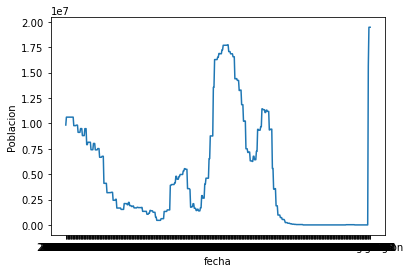

In [391]:
sns.lineplot(x='fecha', y='Poblacion', data=totalchile)
#grafico de total poblacion en chile en cuarentena

In [392]:
totalchile.head()

,Poblacion
fecha,
2020-07-28,9833441
2020-07-29,10609230
2020-07-30,10609230
2020-07-31,10609230
2020-08-01,10609230


In [393]:
totalchile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 2020-07-28 to zona
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Poblacion  496 non-null    int32
dtypes: int32(1)
memory usage: 22.0+ KB


In [394]:
totalchile.loc[totalchile['Poblacion'] == totalchile.max()[0]]
#maximo de personas en cuarentena fecha

,Poblacion
fecha,
Comuna,19458310
Region,19458310
zona,19458310


In [395]:
datos1.head()

,codigo_region,region_residencia,Codigo comuna,comuna_residencia,Poblacion,fecha,paso
775,12,Magallanes,12402,Torres del Paine,0,2020-07-28,3
510,13,Metropolitana,13122,Peñalolén,266798,2020-07-28,1
511,13,Metropolitana,13202,Pirque,0,2020-07-28,3
512,13,Metropolitana,13123,Providencia,157749,2020-07-28,1
513,13,Metropolitana,13124,Pudahuel,253139,2020-07-28,1


In [396]:
region1=datos1[(datos1['codigo_region']==1)] # TARAPACA
region2=datos1[(datos1['codigo_region']==2)] # ANTOFAGASTA
region3=datos1[(datos1['codigo_region']==3)] # ATACAMA
region4=datos1[(datos1['codigo_region']==4)] # COQUIMBO
region5=datos1[(datos1['codigo_region']==5)] # VALPARAISO
region6=datos1[(datos1['codigo_region']==6)] # O'HIGGINS
region7=datos1[(datos1['codigo_region']==7)] # EL MAULE
region8=datos1[(datos1['codigo_region']==8)] # EL BIOBIO
region9=datos1[(datos1['codigo_region']==9)] # LA ARAUCANIA
region10=datos1[(datos1['codigo_region']==10)] # LOS LAGOS
region11=datos1[(datos1['codigo_region']==11)] # AYSEN
region12=datos1[(datos1['codigo_region']==12)] # MAGALLANES Y LA ANTARTICA CHILENA
region13=datos1[(datos1['codigo_region']==13)] # METROPOLITANA DE SANTIAGO
region14=datos1[(datos1['codigo_region']==14)] # LOS RIOS
region15=datos1[(datos1['codigo_region']==15)] # ARICA Y PARINACOTA
region16=datos1[(datos1['codigo_region']==16)] # ÑUBLE


<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

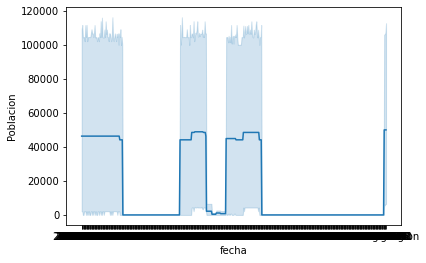

In [398]:
sns.lineplot(x='fecha', y='Poblacion', data=region1)
#cuarentena region 1

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

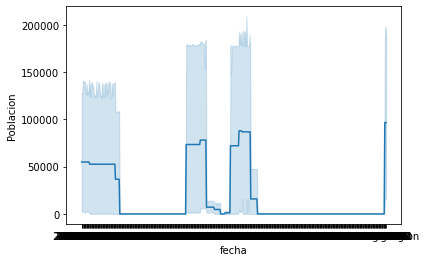

In [399]:
sns.lineplot(x='fecha', y='Poblacion', data=region2)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

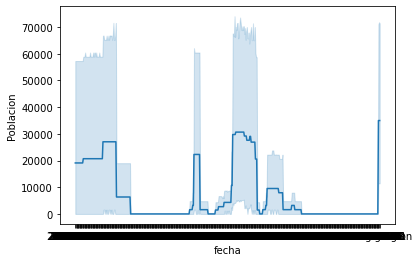

In [400]:
sns.lineplot(x='fecha', y='Poblacion', data=region3)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

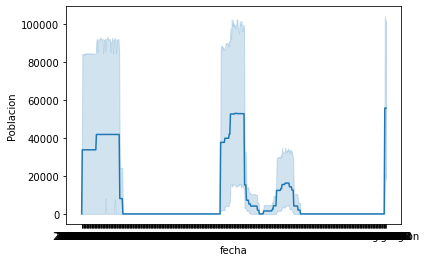

In [401]:
sns.lineplot(x='fecha', y='Poblacion', data=region4)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

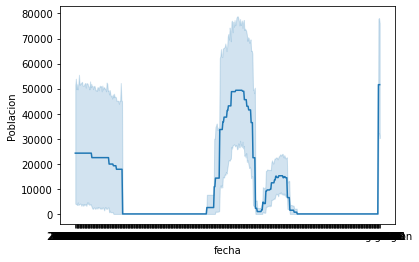

In [402]:
sns.lineplot(x='fecha', y='Poblacion', data=region5)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

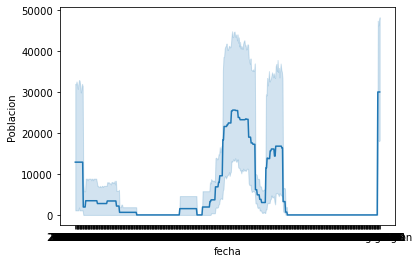

In [403]:
sns.lineplot(x='fecha', y='Poblacion', data=region6)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

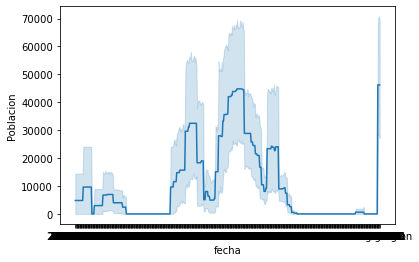

In [404]:
sns.lineplot(x='fecha', y='Poblacion', data=region7)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

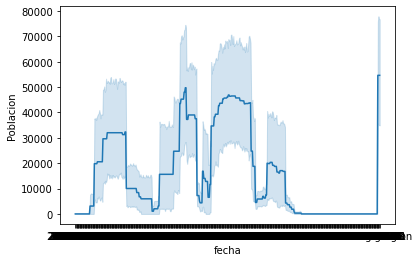

In [405]:
sns.lineplot(x='fecha', y='Poblacion', data=region8)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

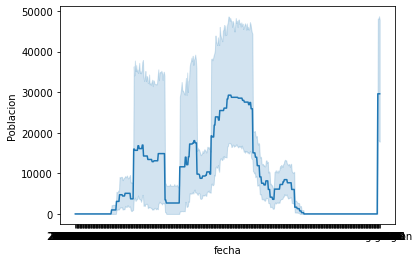

In [406]:
sns.lineplot(x='fecha', y='Poblacion', data=region9)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

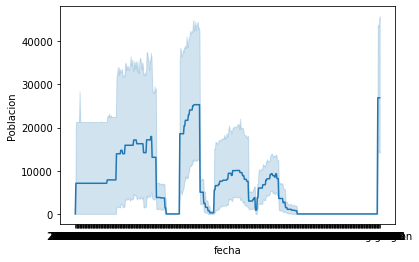

In [407]:
sns.lineplot(x='fecha', y='Poblacion', data=region10)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

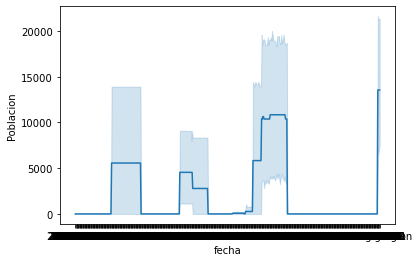

In [408]:
sns.lineplot(x='fecha', y='Poblacion', data=region11)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

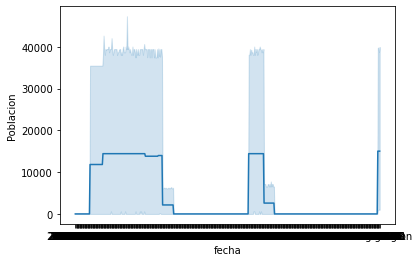

In [409]:
sns.lineplot(x='fecha', y='Poblacion', data=region12)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

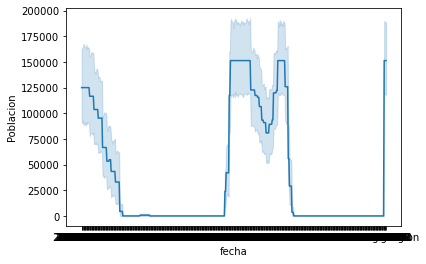

In [410]:
sns.lineplot(x='fecha', y='Poblacion', data=region13)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

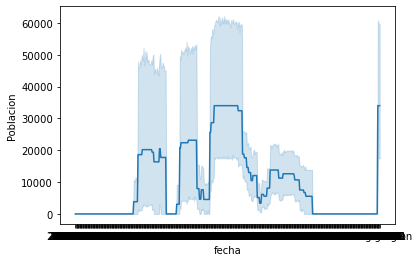

In [411]:
sns.lineplot(x='fecha', y='Poblacion', data=region14)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

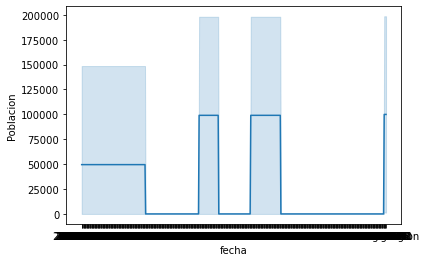

In [412]:
sns.lineplot(x='fecha', y='Poblacion', data=region15)

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

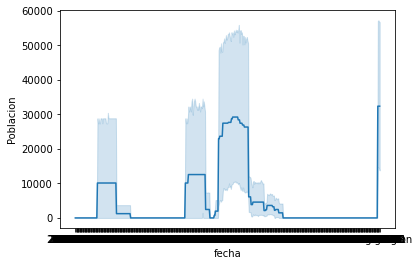

In [413]:
sns.lineplot(x='fecha', y='Poblacion', data=region16)

In [ ]:
s1=paspobr1.groupby(['fecha']).sum()
s2=paspobr2.groupby(['fecha']).sum()
s3=paspobr3.groupby(['fecha']).sum()
s4=paspobr4.groupby(['fecha']).sum()
s5=paspobr5.groupby(['fecha']).sum()
s6=paspobr6.groupby(['fecha']).sum()
s7=paspobr7.groupby(['fecha']).sum()
s8=paspobr8.groupby(['fecha']).sum()
s9=paspobr9.groupby(['fecha']).sum()
s10=paspobr10.groupby(['fecha']).sum()
s11=paspobr11.groupby(['fecha']).sum()
s12=paspobr12.groupby(['fecha']).sum()
s13=paspobr13.groupby(['fecha']).sum()
s14=paspobr14.groupby(['fecha']).sum()
s15=paspobr15.groupby(['fecha']).sum()
s16=paspobr16.groupby(['fecha']).sum()